<a href="https://colab.research.google.com/github/wel51x/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Winston_Lee_LS_DS2_141_Assignment_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
from scipy import stats
#dir(stats)

In [0]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [0]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [0]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [0]:
# TODO - during class, but please help!

# Coke or Pepsi experiment
# This will be represented as a binomial random variable
# 0 = Likes Pepsi
# 1 = Likes Coke

# We want a list of 30 observations (sample size n=30)
# Start by generating random data
import random
# help(random.randint)
random.seed(10)
sample = [random.randint(0, 1) for _ in range(30)]
print(sample)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]


In [0]:
import pandas as pd
df = pd.DataFrame(sample)
df.describe()

,0
count,30.000000
mean,0.600000
std,0.498273
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


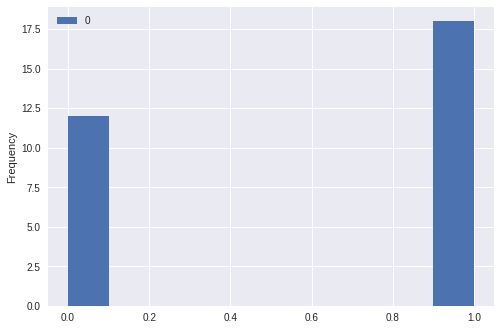

In [0]:
df.plot.hist();

In [0]:
# Now with confidence!

import scipy
# help(scipy.stats.ttest_1samp)
scipy.stats.ttest_1samp(df[0], 0.5)

Ttest_1sampResult(statistic=1.0992421631894096, pvalue=0.2807046476465548)

In [0]:
# Let's try to calculate test statistics from scratch-ish
# We need the sample standard error
df[0].std()

0.4982728791224399

In [0]:
from math import sqrt
df[0].std() / sqrt(30)

0.09097176522946843

In [0]:
# One-liner from Chris
(df[0].mean() - 0.5) / (df[0].std() / (30 ** (1/2)))

1.0992421631894094

In [0]:
# Let's make a reusable function, and do it from scratch!
def std(sample, mean):
  std = 0
  for obs in sample:
    std += (obs - mean)**2
  return (std / (len(sample) - 1)) ** (1/2)

def calculate_t_stat(sample, null_hyp):
  sample_mean = sum(sample) / len(sample)
  sample_std = std(sample, sample_mean)
  return (sample_mean - null_hyp) / (sample_std / (len(sample) ** (1/2)))

As $n \rightarrow \infty$, $\hat{\mu} \approx \mu$

("mu hat" is the sample mean, mu is the "true" population mean)

In [0]:
calculate_t_stat(survey_data, 0.5)

2.364321853156195

In [0]:
pd.DataFrame(survey_data).std()

0    0.478518
dtype: float64

In [0]:
# Let's test it
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

# Try this with both scipy and ours
scipy.stats.ttest_1samp(survey_data, 0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [0]:
len(survey_data)

50

In [0]:
#help(scipy.stats.t)

In [0]:
t = scipy.stats.t(len(survey_data))
t.cdf(calculate_t_stat(survey_data, 0.5))

0.9890062713232346

In [0]:
help(t.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x) method of scipy.stats._distn_infrastructure.rv_frozen instance



In [0]:
# A hacky solution
2 * (1 - t.cdf(calculate_t_stat(survey_data, 0.5)))

0.021987457353530804

In [0]:
# On your own optional stretch goal:
# Figure out how to get t.cdf to give us 1/2 tailed tests and not just the base

# Put the entire above "experiment" in a loop
# and run it a bunch of times for a bunch of different seeds
# and see how often the p value holds

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
# TODO - your code here!
import pandas as pd
from scipy import stats
import random
import scipy

vote_names =\
        [
        "Class",
        "handicapped-infants",
        "water-project-cost-sharing",
        "adoption-of-the-budget-resolution",
        "physician-fee-freeze",
        "el-salvador-aid",
        "religious-groups-in-schools",
        "anti-satellite-test-ban",
        "aid-to-nicaraguan-contras",
        "mx-missile",
        "immigration",
        "synfuels-corporation-cutback",
        "education-spending",
        "superfund-right-to-sue",
        "crime",
        "duty-free-exports",
        "export-administration-act-south-africa"
        ]

voting_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",
                          names=vote_names,
                          converters={'n' : -1, '?' : 0, 'y':1}) # doesn't work


voting_data = voting_data.replace("republican", 'R')
voting_data = voting_data.replace("democrat", 'D')
# n = -1, na or ? = 0, y = 1
voting_data = voting_data.replace('n', -1)
voting_data = voting_data.replace('?', 0)
voting_data = voting_data.replace('y', 1)


In [0]:
voting_data.describe(include="all")

,Class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-0.112644,0.006897,0.188506,-0.160920,0.009195,0.275862,0.131034,0.147126,0.002299,0.009195,-0.262069,-0.142529,0.018391,0.179310,-0.135632,0.475862
std,NaN,0.980784,0.944276,0.970228,0.975194,0.983696,0.949043,0.976133,0.972649,0.975504,0.993021,0.940786,0.954209,0.971783,0.964835,0.958827,0.731920
min,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,NaN,-1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000
75%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
voting_data_R = voting_data[voting_data['Class'] == 'R'].drop('Class', axis = 1)
voting_data_D = voting_data[voting_data['Class'] == 'D'].drop('Class', axis = 1)
voting_data_R.describe(include="all")

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,-0.613095,0.011905,-0.714286,0.958333,0.886905,0.785714,-0.500000,-0.64881,-0.755952,0.113095,-0.696429,0.684524,0.678571,0.922619,-0.761905,0.273810
std,0.780953,0.941321,0.684673,0.253223,0.443524,0.610711,0.847681,0.71878,0.642758,0.987500,0.681307,0.675844,0.694904,0.328251,0.591741,0.893773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000
50%,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.00000,-1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000
75%,-1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,-1.00000,-1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
voting_data_D.describe(include="all")

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,0.202247,0.003745,0.756554,-0.865169,-0.543071,-0.044944,0.528090,0.647940,0.479401,-0.056180,0.011236,-0.662921,-0.397004,-0.288390,0.258427,0.602996
std,0.963778,0.947883,0.634758,0.471544,0.814010,0.983818,0.832921,0.753205,0.837641,0.992751,0.979040,0.703543,0.888349,0.939513,0.936255,0.574906
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,0.500000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,1.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,-1.000000,-0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
voting_data.drop('Class', axis = 1).sum()

handicapped-infants                       -49
water-project-cost-sharing                  3
adoption-of-the-budget-resolution          82
physician-fee-freeze                      -70
el-salvador-aid                             4
religious-groups-in-schools               120
anti-satellite-test-ban                    57
aid-to-nicaraguan-contras                  64
mx-missile                                  1
immigration                                 4
synfuels-corporation-cutback             -114
education-spending                        -62
superfund-right-to-sue                      8
crime                                      78
duty-free-exports                         -59
export-administration-act-south-africa    207
dtype: int64

In [3]:
voting_data_D_sum = voting_data_D.sum()
voting_data_R_sum = voting_data_R.sum()
voting_data_D_sum

handicapped-infants                        54
water-project-cost-sharing                  1
adoption-of-the-budget-resolution         202
physician-fee-freeze                     -231
el-salvador-aid                          -145
religious-groups-in-schools               -12
anti-satellite-test-ban                   141
aid-to-nicaraguan-contras                 173
mx-missile                                128
immigration                               -15
synfuels-corporation-cutback                3
education-spending                       -177
superfund-right-to-sue                   -106
crime                                     -77
duty-free-exports                          69
export-administration-act-south-africa    161
dtype: int64

In [4]:
voting_data_R_sum

handicapped-infants                      -103
water-project-cost-sharing                  2
adoption-of-the-budget-resolution        -120
physician-fee-freeze                      161
el-salvador-aid                           149
religious-groups-in-schools               132
anti-satellite-test-ban                   -84
aid-to-nicaraguan-contras                -109
mx-missile                               -127
immigration                                19
synfuels-corporation-cutback             -117
education-spending                        115
superfund-right-to-sue                    114
crime                                     155
duty-free-exports                        -128
export-administration-act-south-africa     46
dtype: int64

In [13]:
for item in vote_names[1:]:
#  print("==>> Item:", item)
  t_rep, p_rep = scipy.stats.ttest_1samp(voting_data_R[item], 0.0)
#  print("Republican t-statistic", t_rep, ", p-value", p_rep)
  t_dem, p_dem = scipy.stats.ttest_1samp(voting_data_D[item], 0.0)
#  print("Democrat t-statistic", t_dem, ", p-value", p_dem)
  if (abs(t_dem) - abs(t_rep)) > 0.0 and p_dem < .01:
    print("Democrats feel stronger about: %-*s\n\t\t==>> t-statistic: %s, p-value: %s" % (40, item, str(t_dem), str(p_dem)))
  elif (abs(t_rep) - abs(t_dem)) > 0.0 and p_rep < .01:
    print("Republicans feel stronger about: %-*s\n\t\t==>> t-statistic: %s, p-value: %s" % (38, item, str(t_rep), str(p_rep)))
  else:
    print("Neither Party particularly cares about: %-*s\n\t\t==>> Rep p-value: %s, Dem p-value: %s" % (35, item, str(p_rep), str(p_dem)))
  #print()
#print("***Abandoning ship 'til I get clarification***")

Republicans feel stronger about: handicapped-infants                   
		==>> t-statistic: -10.175547000758943, p-value: 3.1600971356609456e-19
Neither Party particularly cares about: water-project-cost-sharing         
		==>> Rep p-value: 0.8699906420050048, Dem p-value: 0.9485697356183775
Democrats feel stronger about: adoption-of-the-budget-resolution       
		==>> t-statistic: 19.475459996476694, p-value: 4.119903926520872e-53
Republicans feel stronger about: physician-fee-freeze                  
		==>> t-statistic: 49.053333953814345, p-value: 4.2285554236275644e-101
Republicans feel stronger about: el-salvador-aid                       
		==>> t-statistic: 25.91876517339876, p-value: 2.0399242521294114e-60
Republicans feel stronger about: religious-groups-in-schools           
		==>> t-statistic: 16.67567035088473, p-value: 2.202655643628355e-37
Democrats feel stronger about: anti-satellite-test-ban                 
		==>> t-statistic: 10.360001908874114, p-value: 2.38126911140

In [0]:
for item in vote_names[1:]:
  t_stat, p_val = stats.ttest_ind(voting_data_D[item],
                                  voting_data_R[item],
                                  equal_var = False)
  if p_val < 0.01 and t_stat > 0:
    print("Democrat Item: %-*s\n\t\t==>> t-statistic: %s, p-value: %s" % (40, item, str(t_stat), str(p_val)))
  elif p_val < 0.01 and t_stat < 0:
    print("Republican Item: %-*s\n\t\t==>> t-statistic: %s, p-value: %s" % (38, item, str(t_stat), str(p_val)))
  else:
    print("Neither Party Item: %-*s\n\t\t==>> t-statistic: %s, p-value: %s" % (35, item, str(t_stat), str(p_val)))


Democrat Item: handicapped-infants                     
		==>> t-statistic: 9.67008151827363, p-value: 4.8080980501440723e-20
Neither Party Item: water-project-cost-sharing         
		==>> t-statistic: -0.08778459765766038, p-value: 0.9300971167247924
Democrat Item: adoption-of-the-budget-resolution       
		==>> t-statistic: 22.4316868913208, p-value: 1.0895246138864557e-68
Republican Item: physician-fee-freeze                  
		==>> t-statistic: -52.32559778411111, p-value: 4.570160514553809e-187
Republican Item: el-salvador-aid                       
		==>> t-statistic: -23.66068387360655, p-value: 1.3486919647068038e-79
Republican Item: religious-groups-in-schools           
		==>> t-statistic: -10.864884268686287, p-value: 1.7672917900103128e-24
Democrat Item: anti-satellite-test-ban                 
		==>> t-statistic: 12.398779465196766, p-value: 1.6115605826873661e-29
Democrat Item: aid-to-nicaraguan-contras               
		==>> t-statistic: 17.98258989268033, p-value: 2.589

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/